# LandSat 8-9 C2 L1 Dataset

### Import Libraries

In [1]:
import os
import rasterio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import cv2

In [24]:
# !pip install matplotlib
# !pip install rasterio
# !pip install pandas
# !pip install opencv-python
# !pip install numpy
# !pip install pyproj

### Global File Path

In [25]:
# Path to data GeoTIFF file
data_path = "D:/CMU/Spacecraft/LandSat/landsat_ot_c2_l1_data/"
label_path = "D:/CMU/Spacecraft/LandSat/landsat_ot_c2_l1_metadata.csv"

### Taking a look at one image

In [26]:
# List all files in the directory and filter for .tif files
filenames = [f for f in os.listdir(data_path) if f.endswith('.tif')]
sample_file_path = os.path.join(data_path, filenames[0])
print(f"Displaying image: {filenames[0]}")  # Print the filename


Displaying image: LO08_L1GT_041025_20201108_20201120_02_T2_refl.tif


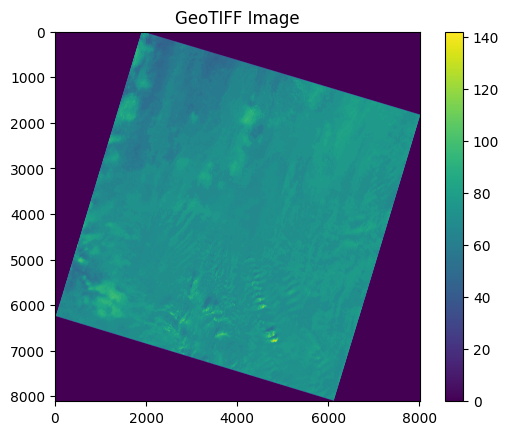

driver: GTiff
dtype: uint8
nodata: None
width: 8011
height: 8111
count: 3
crs: EPSG:32612
transform: | 30.00, 0.00, 242085.00|
| 0.00,-30.00, 5692815.00|
| 0.00, 0.00, 1.00|


In [27]:
# Display the GeoTIFF image using matplotlib
with rasterio.open(sample_file_path) as src:
    img = src.read(1)  # reading the first band; adjust if needed
    
    plt.imshow(img)  # adjust the colormap if needed
    plt.colorbar()
    plt.title("GeoTIFF Image")
    plt.show()

    # Print the metadata
    metadata = src.meta
    for key, value in metadata.items():
        print(f"{key}: {value}")

### Load Labels

In [28]:
# Load the metadata from the CSV file into a DataFrame
df_metadata = pd.read_csv(label_path, encoding='ISO-8859-1')

# Filter the DataFrame to keep only the desired columns
columns_of_interest = [
    "Landsat Product Identifier L1", "WRS Path", "WRS Row", "Roll Angle",
    "Scene Center Latitude", "Scene Center Longitude",
    "Corner Upper Left Latitude", "Corner Upper Left Longitude",
    "Corner Upper Right Latitude", "Corner Upper Right Longitude",
    "Corner Lower Left Latitude", "Corner Lower Left Longitude",
    "Corner Lower Right Latitude", "Corner Lower Right Longitude",
    "Land Cloud Cover", "Scene Cloud Cover L1", "Start Time", "Stop Time"
]
df_metadata = df_metadata[columns_of_interest]

# Function to extract the Landsat Product Identifier from the filename
def extract_identifier(filename):
    return '_'.join(filename.split('_')[:7])

# Extract identifiers from filenames
identifiers = [extract_identifier(filename) for filename in filenames]

# Filter the metadata DataFrame based on the filenames
df_filtered = df_metadata[df_metadata["Landsat Product Identifier L1"].isin(identifiers)]

# Display the DataFrame entry for the first image
display(df_filtered.iloc[0])

Landsat Product Identifier L1    LO08_L1GT_041025_20201108_20201120_02_T2
WRS Path                                                               41
WRS Row                                                                25
Roll Angle                                                            0.0
Scene Center Latitude                                              50.281
Scene Center Longitude                                         -112.93236
Corner Upper Left Latitude                                       51.32791
Corner Upper Left Longitude                                     -114.7021
Corner Upper Right Latitude                                      51.38617
Corner Upper Right Longitude                                   -111.25293
Corner Lower Left Latitude                                       49.14411
Corner Lower Left Longitude                                    -114.53653
Corner Lower Right Latitude                                      49.19805
Corner Lower Right Longitude          

# Sample: LC08_L1TP_009047_20230914_20230919_02_T1

In [51]:
sample_folder_path = "D:/CMU/Spacecraft/LandSat/landsat_c2_l1_sample/"
# Get the list of files in the directory
file_list = os.listdir(sample_folder_path)

LC08_L1TP_009047_20230914_20230919_02_T1_B1.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B10.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B11.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B2.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B3.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B4.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B5.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B6.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B7.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B8.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_B9.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_QA_PIXEL.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_QA_RADSAT.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_qb.tif
LC08_L1TP_009047_20230914_20230919_02_T1_refl.tif
LC08_L1TP_009047_20230914_20230919_02_T1_SAA.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_SZA.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_tir.tif
LC08_L1TP_009047_20230914_20230919_02_T1_VAA.TIF
LC08_L1TP_009047_20230914_20230919_02_T1_VZA.TIF


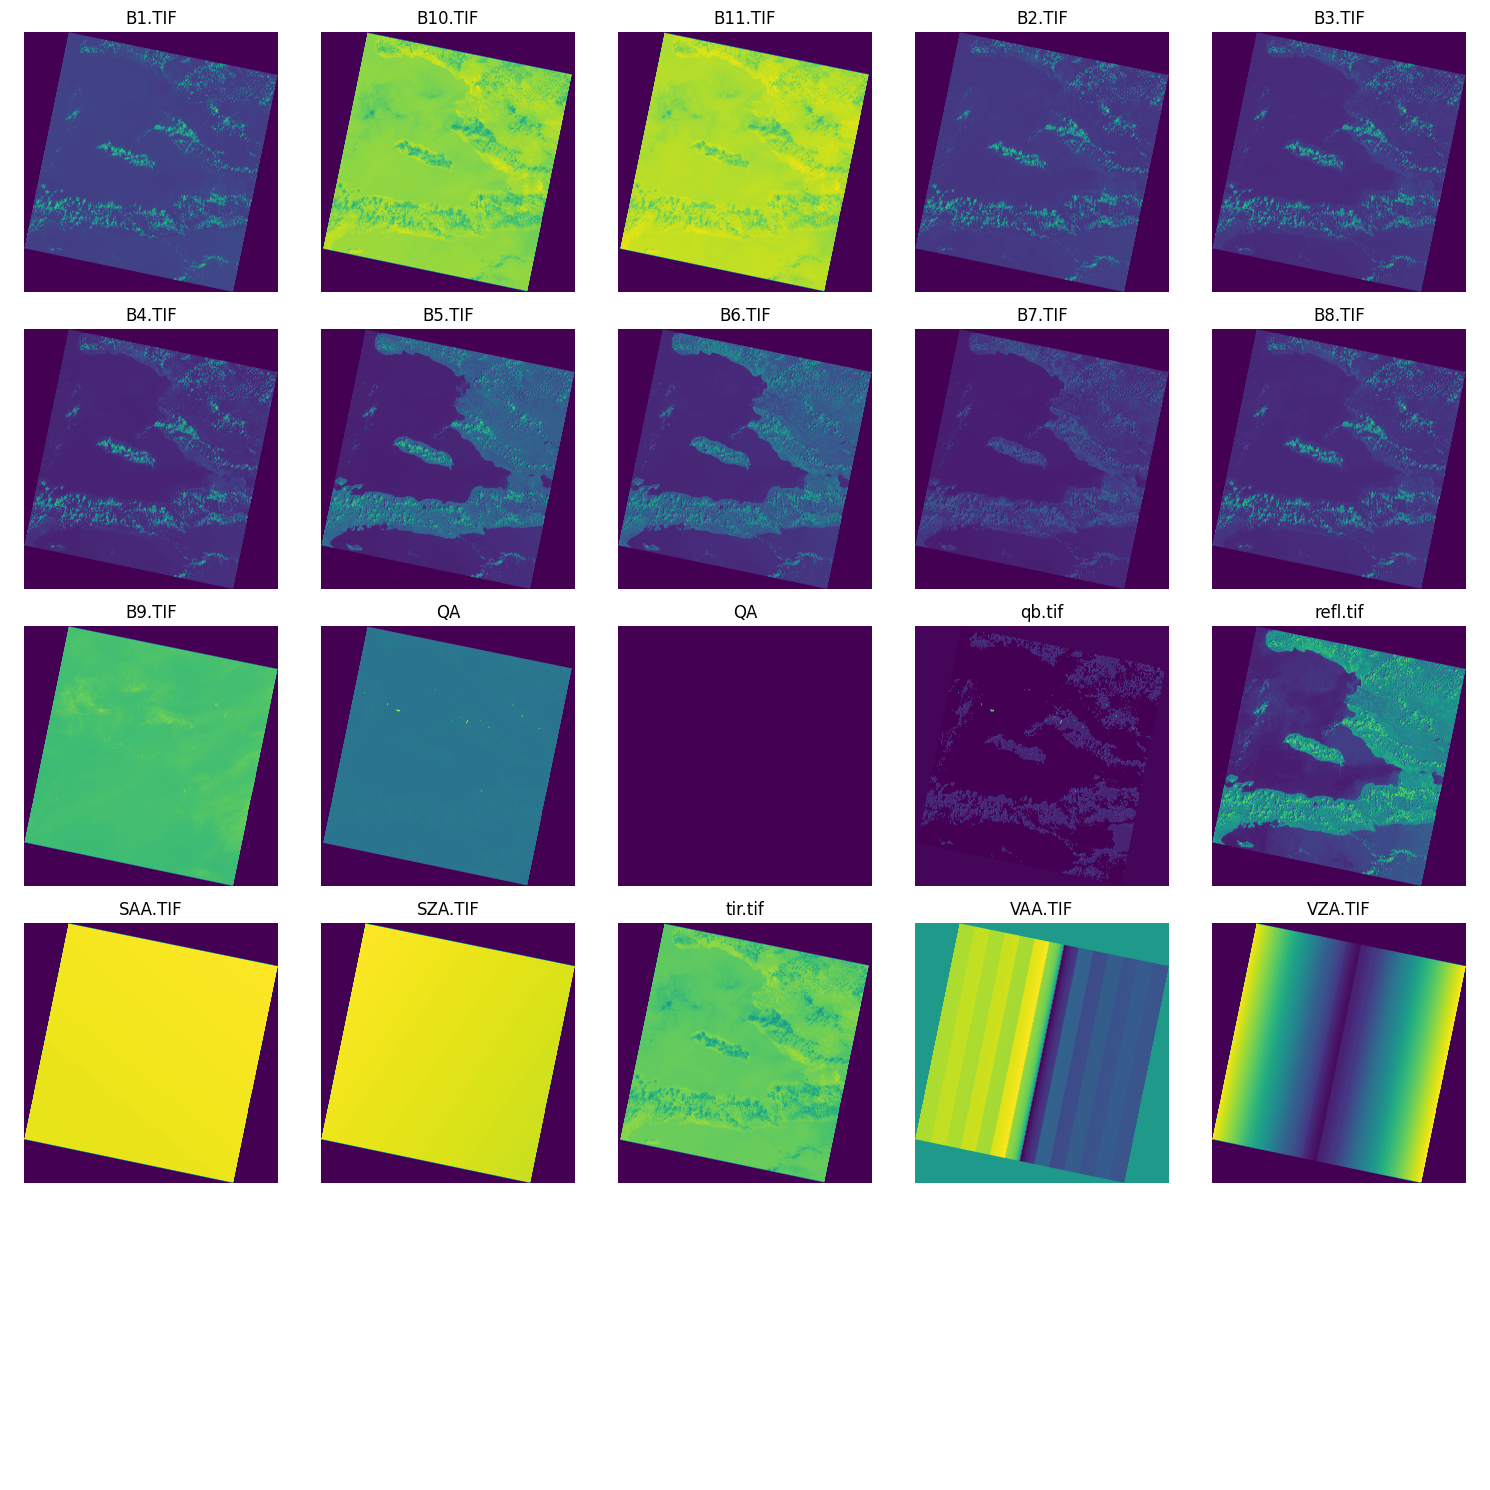

In [52]:
# Get the list of GeoTIFF files in the directory
tif_files = [file for file in os.listdir(sample_folder_path) if file.lower().endswith('.tif')]

# Print the filenames
for tif_file in tif_files:
    print(tif_file)

# Determine an appropriate grid size for plotting
num_images = len(tif_files)
grid_size = int(num_images**0.5) + (1 if (num_images**0.5 - int(num_images**0.5)) > 0 else 0)

fig, axs = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axs array if only 1 row/column
if num_images == 1:
    axs = [axs]
else:
    axs = axs.ravel()


# Plot the images
for i, tif_file in enumerate(tif_files):
    with rasterio.open(os.path.join(sample_folder_path, tif_file)) as src:
        axs[i].imshow(src.read(1))
        axs[i].set_title(tif_file.split('_')[7])
        axs[i].axis('off')

# Turn off any remaining subplots
for j in range(num_images, grid_size*grid_size):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [40]:
# List of attributes to extract from the metadata file
attributes = [
    "LANDSAT_PRODUCT_ID",
    "DATE_ACQUIRED",
    "SCENE_CENTER_TIME",
    "WRS_PATH",
    "WRS_ROW",
    "CLOUD_COVER",
    "CLOUD_COVER_LAND",
    "ROLL_ANGLE",
    "EARTH_SUN_DISTANCE",
    "ORIENTATION",
    "CORNER_UL_PROJECTION_X_PRODUCT",
    "CORNER_UL_PROJECTION_Y_PRODUCT",
    "CORNER_UR_PROJECTION_X_PRODUCT",
    "CORNER_UR_PROJECTION_Y_PRODUCT",
    "CORNER_LL_PROJECTION_X_PRODUCT",
    "CORNER_LL_PROJECTION_Y_PRODUCT",
    "CORNER_LR_PROJECTION_X_PRODUCT",
    "CORNER_LR_PROJECTION_Y_PRODUCT",
    "UTM_ZONE",
    "ELLIPSOID",
    "MAP_PROJECTION"
]

metadata = {}

# Filter for the file with the "_MTL.txt" suffix
mtl_files = [file for file in file_list if file.endswith('_MTL.txt')]

# Open the metadata file and read its contents
if mtl_files:
    mtl_file_path = os.path.join(sample_folder_path, mtl_files[0])
    with open(mtl_file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            for attribute in attributes:
                # Check if the current line contains the attribute
                if line.strip().startswith(attribute):
                    # Split the line using the "=" delimiter and strip any whitespace or quotes
                    value = line.split("=")[1].strip().strip('"')
                    metadata[attribute] = value
else:
    print("No _MTL.txt file found in the specified directory.")

# Convert the dictionary to a pandas DataFrame
metadata_df = pd.DataFrame([metadata])

display(metadata_df.iloc[0])


LANDSAT_PRODUCT_ID                LC08_L1TP_009047_20230914_20230919_02_T1
WRS_PATH                                                                 9
WRS_ROW                                                                 47
DATE_ACQUIRED                                                   2023-09-14
SCENE_CENTER_TIME                                        15:14:59.8256630Z
CLOUD_COVER                                                          24.39
CLOUD_COVER_LAND                                                     24.39
ROLL_ANGLE                                                          -0.001
EARTH_SUN_DISTANCE                                               1.0060114
MAP_PROJECTION                                                         UTM
ELLIPSOID                                                            WGS84
UTM_ZONE                                                                18
ORIENTATION                                                       NORTH_UP
CORNER_UL_PROJECTION_X_PR

# Finding Pixels Corresponding to a Known Latitude/Longitude

![Alt text](image.png)

In [41]:
Gonave_Island_lat = 18.833535
Gonave_Island_lon = -73.048561

In [39]:
from pyproj import Proj

# Function to convert lat-lon pair to LandSat UTM cooridinates
def convert_latlon_to_utm(lat, lon, df):
    UTM_ZONE = int(df.iloc[0]['UTM_ZONE'])
    ELLIPSOID = df.iloc[0]['ELLIPSOID']
    MAP_PROJECTION = df.iloc[0]['MAP_PROJECTION'].lower()
    
    # Define the UTM projection using the zone number and hemisphere
    utm_proj = Proj(proj=MAP_PROJECTION, zone=UTM_ZONE, ellps=ELLIPSOID, is_north=True)
    
    # Convert the latitude and longitude to UTM coordinates
    utm_x, utm_y = utm_proj(lon, lat)
    
    return utm_x, utm_y

Image Upper Left coordinates: 614100.0, 2193900.0
Image Lower Right coordinates: 840300.0, 1962600.0
Gonave Island coordinates: 3051.198093805111, 3679.1654400951784


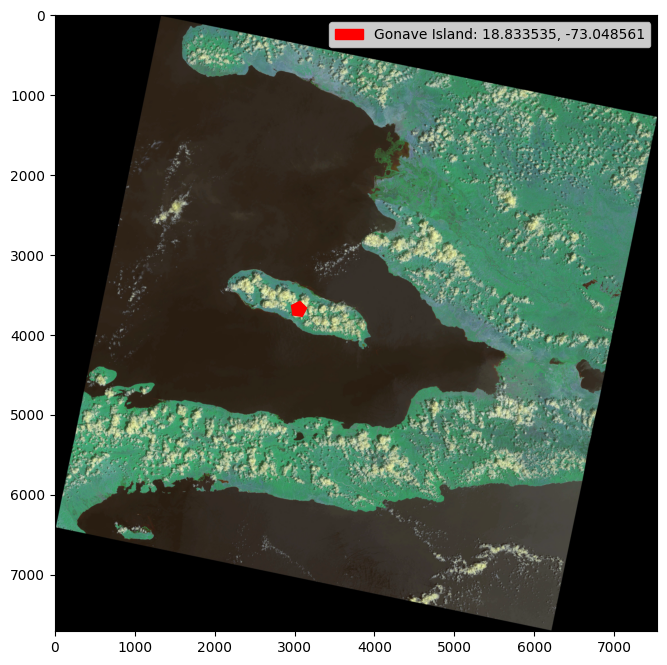

In [50]:
# Getting coordinates of the four corners of the image file
UL_X, UL_Y = float(metadata_df.iloc[0]['CORNER_UL_PROJECTION_X_PRODUCT']), float(metadata_df.iloc[0]['CORNER_UL_PROJECTION_Y_PRODUCT'])
LR_X, LR_Y = float(metadata_df.iloc[0]['CORNER_LR_PROJECTION_X_PRODUCT']), float(metadata_df.iloc[0]['CORNER_LR_PROJECTION_Y_PRODUCT'])
print(f"Image Upper Left coordinates: {UL_X}, {UL_Y}")
print(f"Image Lower Right coordinates: {LR_X}, {LR_Y}")

# Gonova island lat/lon in LandSat UTM coordinates
TARGET_X, TARGET_Y = convert_latlon_to_utm(Gonave_Island_lat, Gonave_Island_lon, metadata_df)

# Perform a linear transformation of UTM coordinates to pixel position
Gonave_Island_X = img.shape[1] + (img.shape[1]) * (TARGET_X - LR_X)/(LR_X - UL_X)
Gonave_Island_Y = img.shape[0] + (img.shape[0]) * (TARGET_Y - LR_Y)/(LR_Y - UL_Y)
print(f"Gonave Island coordinates: {Gonave_Island_X}, {Gonave_Island_Y}")

# Find Gonova island in Landsat image
file = os.path.join(sample_folder_path, 'LC08_L1TP_009047_20230914_20230919_02_T1_refl.tif')
img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
fig, ax = plt.subplots (figsize = (8,8))
# Create a star patch
star = patches.RegularPolygon((Gonave_Island_X, Gonave_Island_Y), numVertices=5, radius=100,
                              orientation=np.pi/4, edgecolor='red', facecolor='red', fill=True, label=f'Gonave Island: {Gonave_Island_lat}, {Gonave_Island_lon}')
ax.add_patch(star)
ax.legend()
ax.imshow(img)

